# <span style="color:blue"> Importing Libraries</span>

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

[percpu.cc : 552] RAW: rseq syscall failed with errno 1


# <span style="color:blue">Loadings Datasets </span>

In [2]:
paths=['/kaggle/input/brain-tumor-mri-dataset/Training/',
       '/kaggle/input/brain-tumor-mri-dataset/Testing/']

# <span style="color:blue">Pre-processing </span>

In [3]:
# Function to display image
def imshow(img):
    fig,ax=plt.subplots(1,1,figsize=(8,8))
    ax.imshow(img,cmap='gray')

In [4]:
# Labels
labels=os.listdir(paths[0])
labels

['pituitary', 'notumor', 'meningioma', 'glioma']

In [5]:
# Create image generators for the training and validation set, 90-10 %
train_datagen = ImageDataGenerator(validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    paths[0],
    target_size=(320, 320),
    batch_size=32,
    class_mode='binary',
    subset='training',
    seed=0)

validation_generator = train_datagen.flow_from_directory(
    paths[0],
    target_size=(320, 320),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    seed=0)


Found 5143 images belonging to 4 classes.
Found 569 images belonging to 4 classes.


### For train

In [6]:
# Storing images and labels in lists
x_train = []
y_train = []
for i in range(len(train_generator)):
    images, label = train_generator[i] 
    images/= 255.0
    x_train.extend(images)
    y_train.extend(label)
    
# Converting to arrays
x_train=np.array(x_train)
y_train=np.array(y_train)

# type conversion
y_train = y_train.astype(int)

### For validation

In [7]:
# Storing images and labels in lists
x_val = []
y_val = []
for i in range(len(validation_generator)):
    images, label = validation_generator[i]
    images/= 255.0
    x_val.extend(images)
    y_val.extend(label)

# Converting to arrays
x_val=np.array(x_val)
y_val=np.array(y_val)

# type conversion
y_val = y_val.astype(int)

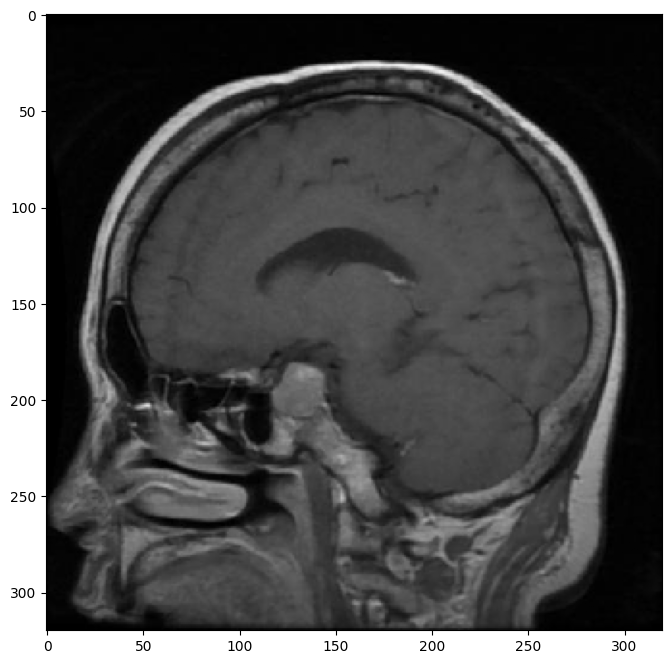

In [8]:
# Train image
imshow(x_train[0])

In [9]:
# Train label
labels[y_train[0]]

'glioma'

In [10]:
# One-hot labels
y_trainOneHot=tf.one_hot(y_train,len(labels))
y_valOneHot=tf.one_hot(y_val,len(labels))

# <span style="color:blue">Training and Validation </span>

In [11]:
# Convolutional neural network
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(320,320,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 318, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 159, 159, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 157, 157, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 78, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 76, 76, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 38, 38, 128)      0

In [13]:
# Creating callback objects
checkpoint=ModelCheckpoint('checkpoint/model.{epoch:d}.h5',save_best_only=False, save_freq='epoch')
tensorboard_callback=TensorBoard('logs/cnn_logs',histogram_freq=1)

In [14]:
x_train.shape

(5143, 320, 320, 3)

In [15]:
x_val.shape

(569, 320, 320, 3)

In [16]:
# Model training
model.fit(x_train,
          y_trainOneHot,
          epochs=20,
          batch_size=64,
          validation_data=(x_val,y_valOneHot),
          callbacks=[tensorboard_callback,checkpoint]
)

Epoch 1/20
81/81 [==============================] - 175s 2s/step - loss: 0.8885 - accuracy: 0.6284 - val_loss: 0.7674 - val_accuracy: 0.6415
Epoch 2/20
81/81 [==============================] - 172s 2s/step - loss: 0.5177 - accuracy: 0.8081 - val_loss: 0.5552 - val_accuracy: 0.8524
Epoch 3/20
81/81 [==============================] - 173s 2s/step - loss: 0.4276 - accuracy: 0.8400 - val_loss: 0.4970 - val_accuracy: 0.8506
Epoch 4/20
81/81 [==============================] - 175s 2s/step - loss: 0.3384 - accuracy: 0.8732 - val_loss: 0.4745 - val_accuracy: 0.8330
Epoch 5/20
81/81 [==============================] - 175s 2s/step - loss: 0.2826 - accuracy: 0.8933 - val_loss: 0.6471 - val_accuracy: 0.8172
Epoch 6/20
81/81 [==============================] - 175s 2s/step - loss: 0.2506 - accuracy: 0.9014 - val_loss: 0.5814 - val_accuracy: 0.8120
Epoch 7/20
81/81 [==============================] - 174s 2s/step - loss: 0.2145 - accuracy: 0.9166 - val_loss: 0.6432 - val_accuracy: 0.8313
Epoch 8/20
81

# <span style="color:blue">Testing </span>

In [17]:
# Create image generators for the testing
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    paths[1],
    target_size=(320, 320),
    batch_size=32,
    class_mode='binary')

# Storing images and labels in lists
x_test=[]
y_test=[]
for i in range(len(test_generator)):
    images, label = test_generator[i] 
    images/= 255.0
    x_test.extend(images)
    y_test.extend(label)
    
# Converting to arrays
x_test=np.array(x_val)
y_test=np.array(y_val)

y_test = y_test.astype(int)

# One-hot label
y_testOneHot=tf.one_hot(y_test,len(labels))

Found 1311 images belonging to 4 classes.


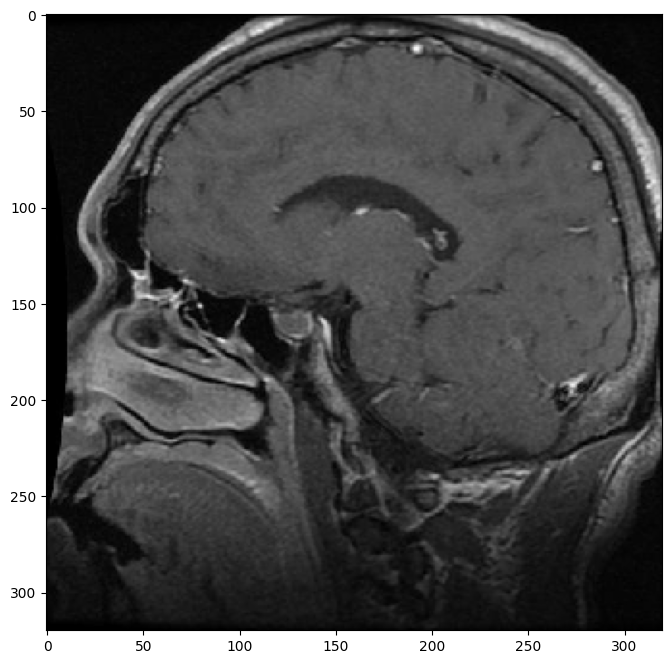

In [18]:
imshow(x_test[0])

In [19]:
# Label prediction 
labels[np.argmax(model.predict(x_test[0:1]))]

1/1 [==============================] - 0s 146ms/step


'glioma'

In [20]:
# Label 
labels[y_test[0]]

'glioma'

In [21]:
# Evaluating the model
model.evaluate(x=x_test,y=y_testOneHot)

18/18 [==============================] - 3s 164ms/step - loss: 0.8167 - accuracy: 0.8295


[0.8167290091514587, 0.8295254707336426]

> **test accuracy: 0.8612**

In [22]:
# Zipping folder for Tensorboard usage in google Collab
!apt-get update
!apt-get install -y zip
!zip -r /kaggle/working/logs.zip /kaggle/working/logs

Get:1 http://deb.debian.org/debian bullseye InRelease [116 kB]
Get:2 http://deb.debian.org/debian-security bullseye-security InRelease [48.4 kB]
Get:3 http://deb.debian.org/debian bullseye-updates InRelease [44.1 kB]
Get:4 http://deb.debian.org/debian bullseye/main amd64 Packages [8183 kB]
Get:5 http://deb.debian.org/debian-security bullseye-security/main amd64 Packages [228 kB]
Get:6 http://deb.debian.org/debian bullseye-updates/main amd64 Packages [14.6 kB]
Fetched 8634 kB in 3s (2839 kB/s)




The following NEW packages will be installed:
  zip
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 232 kB of archives.
After this operation, 638 kB of additional disk space will be used.
Get:1 http://deb.debian.org/debian bullseye/main amd64 zip amd64 3.0-12 [232 kB]
Fetched 232 kB in 0s (3428 kB/s)
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package zip.
(Reading database ... 23423 files and directories

> we use the last checkpoint

### **Use in case you want to use another checkpoint**

In [23]:
#model.load_weights("./checkpoint/model.20.h5")

In [24]:
#model.evaluate(x=x_test,y=y_testOneHot)